In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('../Inventory.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128, 32))

img.shape

(32, 128)

类间方差最大阈值： 202


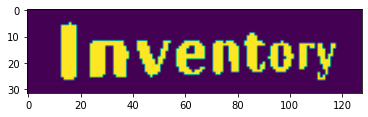

In [16]:
# 大津二值化算法
def otsu(img):
    h, w = img.shape
    threshold_t = 0
    max_g = 0
    
    for t in range(255):
        n0 = img[np.where(img < t)]
        n1 = img[np.where(img >= t)]
        w0 = len(n0) / (h * w)
        w1 = len(n1) / (h * w)
        u0 = np.mean(n0) if len(n0) > 0 else 0
        u1 = np.mean(n1) if len(n0) > 0 else 0
        
        g = w0 * w1 * (u0 - u1) ** 2
        if g > max_g:
            max_g = g
            threshold_t = t
    print('类间方差最大阈值：', threshold_t)
    img[img < threshold_t] = 0
    img[img >= threshold_t] = 255
    return img

otsu_img = otsu(img)
plt.imshow(otsu_img)